In [1]:
import face_recognition as fr
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
KNOWN_FACES = "known"
UNKNOWN_FACES = "unknown"
TOLERANCE = 0.5
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'hog'

In [3]:
print("loading known faces")
known_faces=[]
known_names=[]

loading known faces


In [4]:
for name in os.listdir(KNOWN_FACES):
    for filename in os.listdir(f"{KNOWN_FACES}/{name}"):
        image = fr.load_image_file(f"{KNOWN_FACES}/{name}/{filename}")
        encoding = fr.face_encodings(image)[0]
        known_faces.append(encoding)
        known_names.append(name)

processing unknown faces
jason-ross-1000-faces-tour-tickets_03-13-20_17_5da8b20c3e9e3.jpg


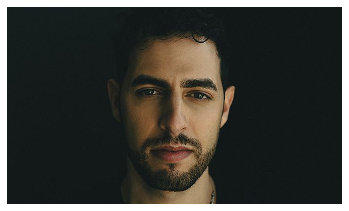

EAI2YVUDPRGJPLE6ORA6ABJAU4.jpg


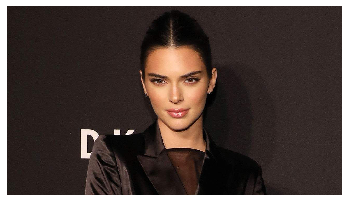

shutterstock_6247905n.jpg
Match found: kylie jenner


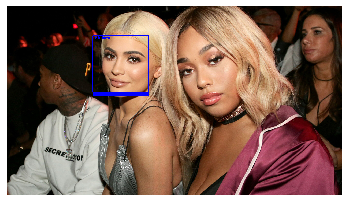

DSC_8737.jpg


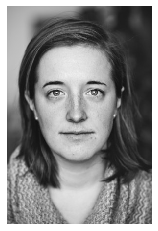

portrait-photography-natural-light-1.jpg


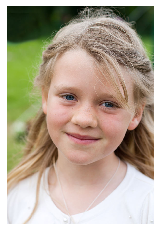

maxresdefault.jpg


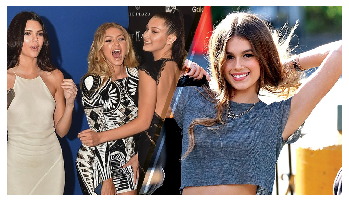

cdn.cliqueinc.com__cache__posts__85316__face-map-802371-1472235296.700x0c-49af2f601ff04e8f8caba84798e8a307.jpg


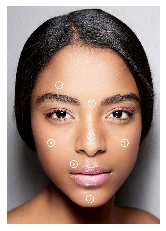

60888834_2222943384448137_6227430051649384470_n.jpg


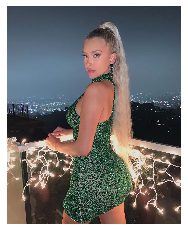

photo.jpg


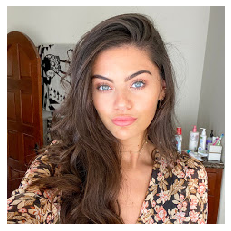

Seeing-Double-Kylie-Jenner-Friendship-With-Jordyn-Vs-Stassie-landing.jpg
Match found: kylie jenner


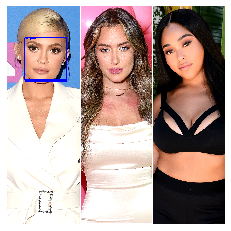

mqdefault.jpg


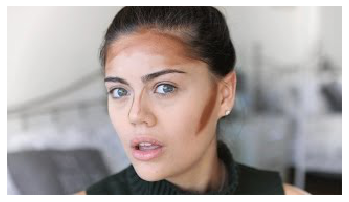

TJMNNSEYEBCIPOT3ODOSZ2DP4Q.jpg
Match found: obama


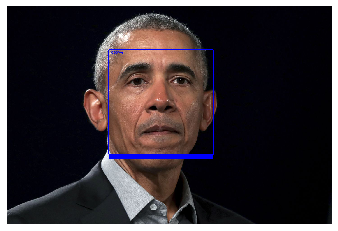

In [5]:
print("processing unknown faces")
for filename in os.listdir (UNKNOWN_FACES):
    #print(filename)
    image =  fr.load_image_file(f"{UNKNOWN_FACES}/{filename}")
    locations = fr.api.face_locations(image,number_of_times_to_upsample=1,model=MODEL)
    encodings = fr.face_encodings(image,locations)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    for face_encoding, face_location in zip(encodings,locations):
        results = fr.compare_faces(known_faces,face_encoding, TOLERANCE)
        match = None
        if True in results:
            match = known_names[results.index(True)]
            print(f"Match found: {match}")
            
            tlc = (face_location[3], face_location[0])
            brc = (face_location[1], face_location[2])
            Color = [0,255,0]
            cv2.rectangle(image,tlc,brc,(255,0,0),3)
            
            tlc = (face_location[3], face_location[2])
            brc = (face_location[1], face_location[2]+22)
            cv2.rectangle(image,tlc,brc,(255,0,0),cv2.FILLED)
            cv2.putText(image,match,(face_location[3]+10, face_location[0]+15), cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),FONT_THICKNESS)
    #cv2.imshow(filename,image)
    #cv2.waitKey(5000)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
            